In [46]:
import pandas as pd
import os
import calendar
pd.set_option('display.max_rows', 1800)

In [47]:
files = [file for file in os.listdir('C:\Files\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
df = pd.DataFrame()
for file in files:
    file_ = pd.read_csv('C:\Files\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\' + file)
    df = pd.concat([df, file_])

In [48]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [49]:
df.dropna(how='all', inplace=True)

In [50]:
df.reset_index(drop=True, inplace=True)
df['Month']= df['Order Date'].str[:2]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [51]:
x = []
y = '0'
for i in range(12):
    if i <10:
        x.append(y + str(i))
    else:
        x.append(str(i))
df.loc[~df['Month'].isin(x)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [52]:
df_ = df.loc[df['Month']=='Or']

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186305 non-null  object
dtypes: object(7)
memory usage: 9.9+ MB


In [54]:
df = df[df['Month']!='Or']

In [55]:
df.loc[:,'Month']= df['Month'].astype(int)

In [56]:
df.loc[:,'Quantity Ordered']= df['Quantity Ordered'].astype(int)
df.loc[:,'Price Each']= df['Price Each'].astype(float)

In [76]:
df.loc[:,'Sales'] = df['Quantity Ordered'] * df['Price Each']

Which Month had the biggest Sales?

In [58]:
total = df.groupby('Month')[['Quantity Ordered', 'Sales']].sum()

In [59]:
month_name = [calendar.month_name[int(i)] for i in total.index.tolist()]

Text(0, 0.5, 'Sales USD (Millions')

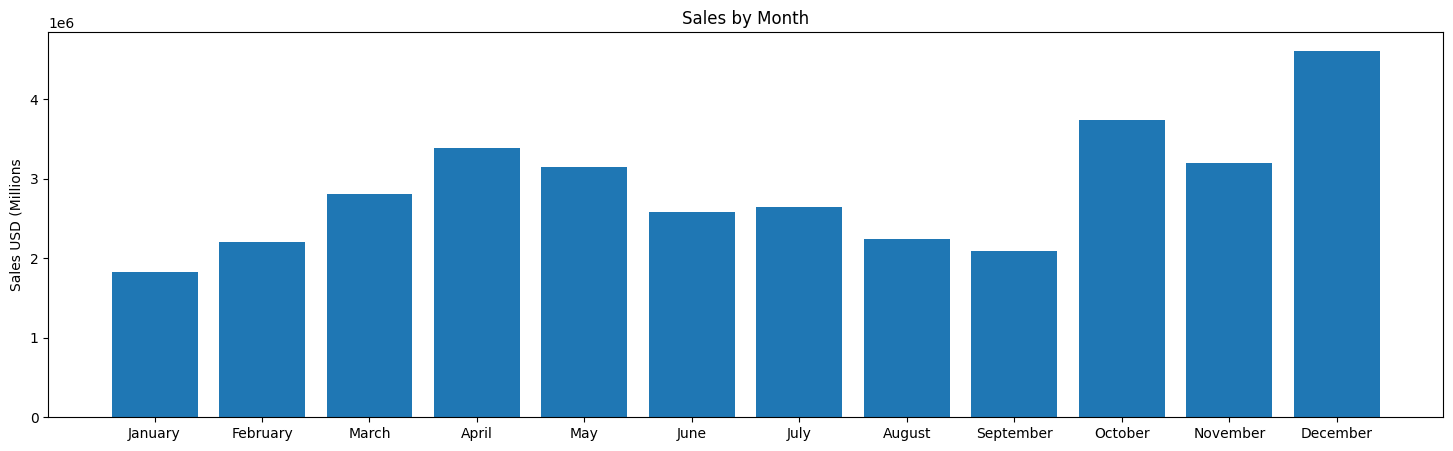

In [60]:
import matplotlib.pyplot as plt
import calendar
plt.figure(figsize=(18,5))
month_name = [calendar.month_name[int(i)] for i in total.index.tolist()]
plt.bar(month_name, total['Sales'])
plt.title('Sales by Month')
plt.ylabel('Sales USD (Millions')

Which cities sold the most?

In [61]:
df.loc[:,'Purchase Address'] = df['Purchase Address'].astype(str)

In [62]:
x = df['Purchase Address'].apply(lambda x: x[x.find(',')+2:x.find(',', x.find(',')+8)])

In [63]:
df.loc[:,['City']] = x

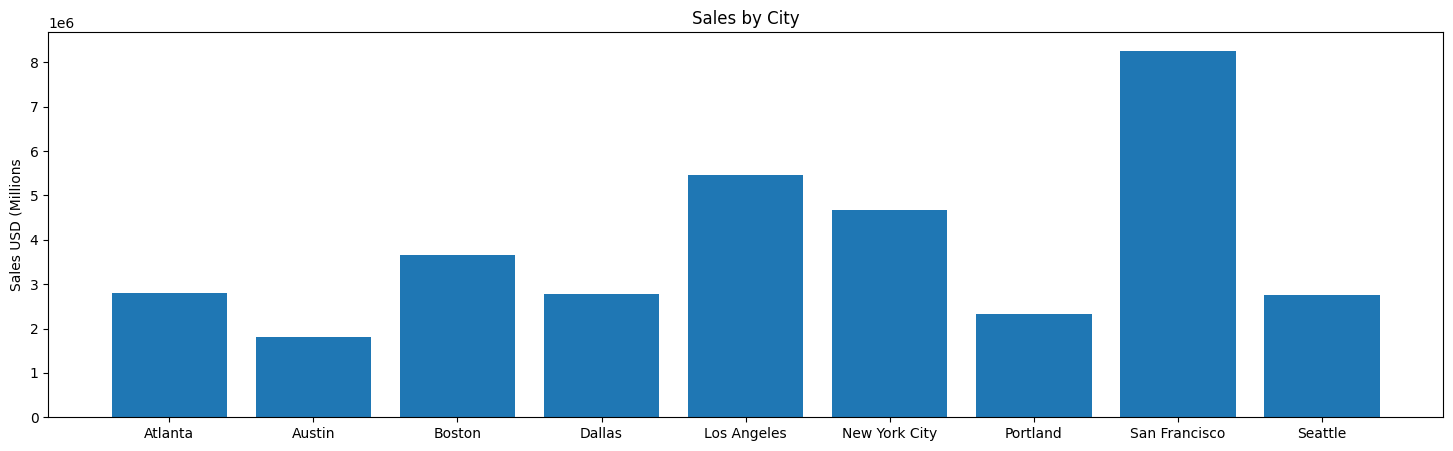

In [64]:
sales = df.groupby(['City'])['Sales'].sum().reset_index()


plt.figure(figsize=(18,5))
plt.bar(sales['City'], sales['Sales']) 

plt.title('Sales by City')
plt.ylabel('Sales USD (Millions')
plt.show()



In [65]:
sales.sort_values(by='Sales', ascending=False)

,City,Sales
7,San Francisco,8262203.910004
4,Los Angeles,5452570.800002
5,New York City,4664317.430002
2,Boston,3661642.010001
0,Atlanta,2795498.58
3,Dallas,2767975.4
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


What time of the day is best for the orders

In [79]:
date = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df.loc[:,['Hour']] = date.dt.hour
df.loc[:,['Minute']] = date.dt.minute

Text(0.5, 0, 'Hours')

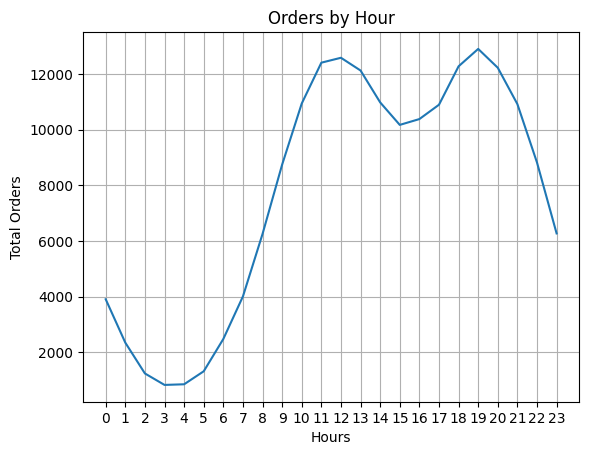

In [67]:
hours_group = df.groupby('Hour')
counts= hours_group['Order ID'].count()
hours = [hour for hour, df in hours_group]
plt.plot(hours, counts)
plt.xticks(hours)
plt.grid()
plt.title('Orders by Hour')
plt.ylabel('Total Orders')
plt.xlabel('Hours')

Which products were sold together the most?

In [68]:
from itertools import combinations
from collections import Counter
orders = df.groupby('Order ID')['Product'].agg(lambda x: ' ,'.join(x)).reset_index()
count  = Counter()
for i in orders.iloc[:,1].str.split(' ,'):
    count.update(Counter(combinations(i, 3)))

    
for key, value in count.most_common(10):
    print (key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [69]:
count  = Counter()
for i in orders.iloc[:,1].str.split(' ,'):
    count.update(Counter(combinations(i, 2)))

    
for key, value in count.most_common(10):
    print (key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Which products sold the most?

In [70]:
most = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).reset_index().head()

most

,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557


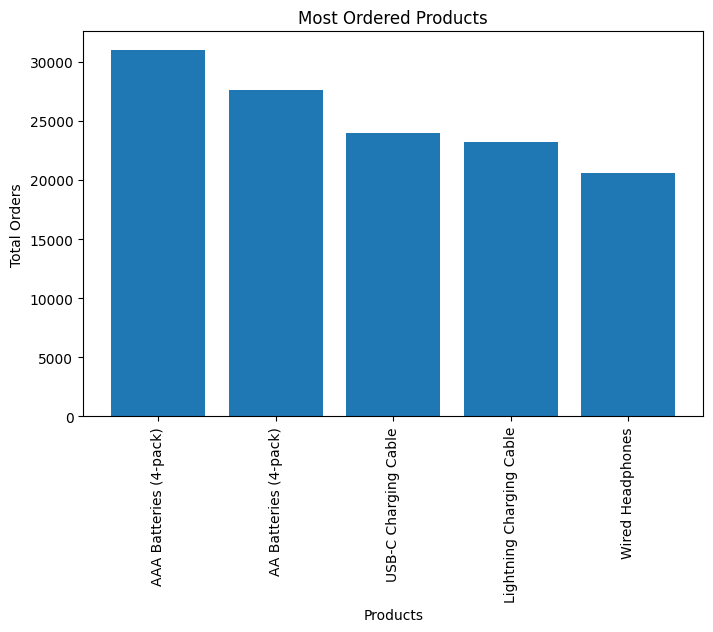

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(most.iloc[:,0], most.iloc[:,1]) 
plt.xticks(rotation=90)
plt.title('Most Ordered Products')
plt.xlabel('Products')
plt.ylabel('Total Orders')
plt.show()

Best products by Sales

In [75]:
most = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).reset_index()
most.head()

,Product,Sales
0,Macbook Pro Laptop,8037600.0
1,iPhone,4794300.0
2,ThinkPad Laptop,4129958.7
3,Google Phone,3319200.0
4,27in 4K Gaming Monitor,2435097.56


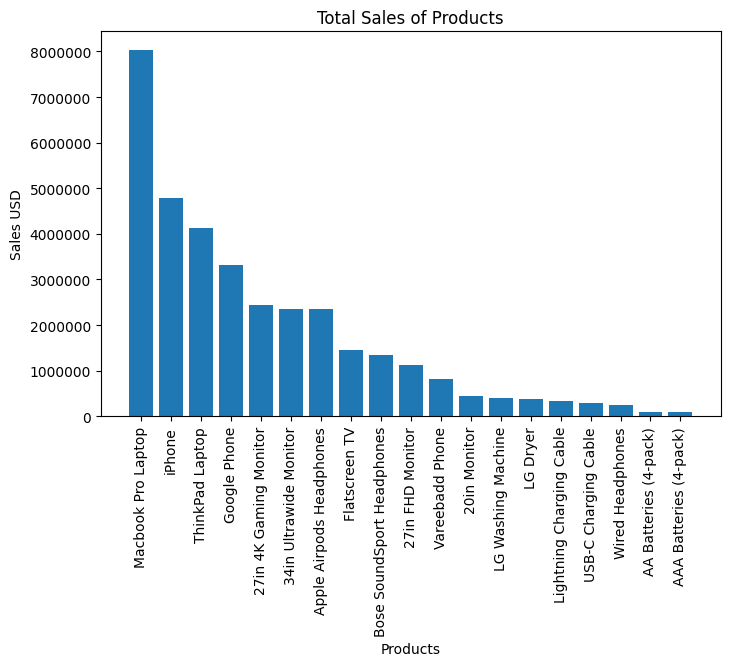

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(most.iloc[:,0], most.iloc[:,1]) 
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Sales USD')
plt.xlabel('Products')
plt.title('Total Sales of Products')
plt.show()

Why did some product sell more than others? The price had a big effect on sales

<Figure size 800x500 with 0 Axes>

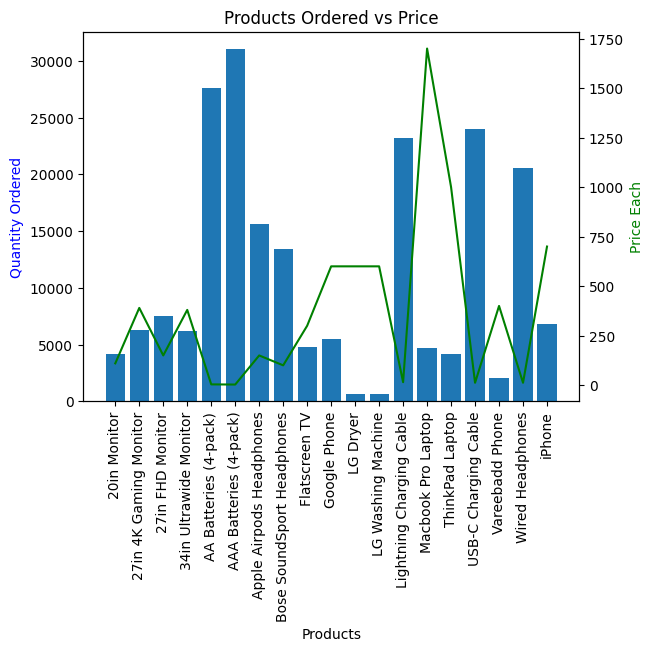

In [74]:
import matplotlib.pyplot as plt
products_group = df.groupby('Product')
products = [product for product, df in products_group]

quantity = products_group['Quantity Ordered'].sum()
price = products_group['Price Each'].mean()

plt.figure(figsize=(8,5))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity) 
ax2.plot(products, price, color= 'g')

ax1.set_xticks(products)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color= 'b')
ax2.set_ylabel('Price Each', color= 'g')
plt.title('Products Ordered vs Price')

ax1.set_xticklabels(products, rotation=90)
plt.show()